# Node Tuning

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import kerastuner as kt # for tuning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Flatten

C:\Users\Gyanprakash\AppData\Local\Temp\ipykernel_20356\3655248104.py:9: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt # for tuning


In [ ]:
df = pd.read_csv('diabetes.csv')
X = df.drop(columns=['Outcome'])
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.25, random_state=42)
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[ 0.6839137 , -0.70579433, -0.625833  , ...,  0.26501306,
        -0.11390738,  0.87654579],
       [-0.52726014, -0.26972894,  0.29889263, ...,  0.48823955,
        -0.94569142, -1.03690611],
       [-0.52726014, -0.39431905, -0.29945925, ..., -0.15517797,
        -0.91619553, -1.03690611],
       ...,
       [ 0.6839137 ,  0.07289387,  0.13570575, ...,  0.21248918,
         0.77981801,  0.09377001],
       [-0.22446668, -1.32874488, -1.06099801, ..., -0.12891603,
        -0.65073254, -0.60203068],
       [-0.22446668, -0.45661411,  0.13570575, ..., -0.81172646,
        -0.77166568, -0.51505559]])

In [ ]:
def build_model(hp):
    model = Sequential()

    units = hp.Int('numberOfNodes',
                   min_value = 8, # initial value
                   max_value = 128, # last value
                   )
    initializer = tf.keras.initializers.he_normal
    model.add(
        Dense(units=units,activation = 'relu',input_dim = 8,kernel_initializer = initializer))
    model.add(
        Dense(1,activation = 'sigmoid'))

    model.compile(optimizer = 'adam',loss='binary_crossentropy',metrics = ['accuracy'])

    return model


In [ ]:
tuner = kt.RandomSearch(hypermodel=build_model,
                        objective='val_accuracy',
                        max_trials=5,
                        directory='tuner',
                        project_name = 'nodeTuner'
                        )

In [ ]:
tuner.search(X_train,y_train,epochs = 5,validation_data = (X_test,y_test))

Trial 5 Complete [00h 00m 02s]
val_accuracy: 0.6510416865348816

Best val_accuracy So Far: 0.6510416865348816
Total elapsed time: 00h 00m 09s
INFO:tensorflow:Oracle triggered exit


In [ ]:
# for best parameters
tuner.get_best_hyperparameters()[0].values

{'numberOfNodes': 53}

In [ ]:
# to directly extract model from hyperparameter tuning...........
model = tuner.get_best_models(num_models=1)[0]
model

In [ ]:
# Training model
history = model.fit(X_train,y_train,batch_size=32,epochs=100,initial_epoch=6,validation_data=(X_test,y_test))

Epoch 7/100
18/18 [==============================] - 1s 12ms/step - loss: 4.9740 - accuracy: 0.6337 - val_loss: 4.0921 - val_accuracy: 0.5729
Epoch 8/100
18/18 [==============================] - 0s 3ms/step - loss: 3.9225 - accuracy: 0.6094 - val_loss: 4.0037 - val_accuracy: 0.5781
Epoch 9/100
18/18 [==============================] - 0s 3ms/step - loss: 3.6475 - accuracy: 0.6094 - val_loss: 3.7451 - val_accuracy: 0.6094
Epoch 10/100
18/18 [==============================] - 0s 3ms/step - loss: 3.3951 - accuracy: 0.6163 - val_loss: 3.5188 - val_accuracy: 0.6198
Epoch 11/100
18/18 [==============================] - 0s 3ms/step - loss: 3.1716 - accuracy: 0.6181 - val_loss: 3.2444 - val_accuracy: 0.6094
Epoch 12/100
18/18 [==============================] - 0s 3ms/step - loss: 2.9573 - accuracy: 0.6233 - val_loss: 3.0830 - val_accuracy: 0.6458
Epoch 13/100
18/18 [==============================] - 0s 4ms/step - loss: 2.7149 - accuracy: 0.6354 - val_loss: 2.7930 - val_accuracy: 0.6354
Epoch 14

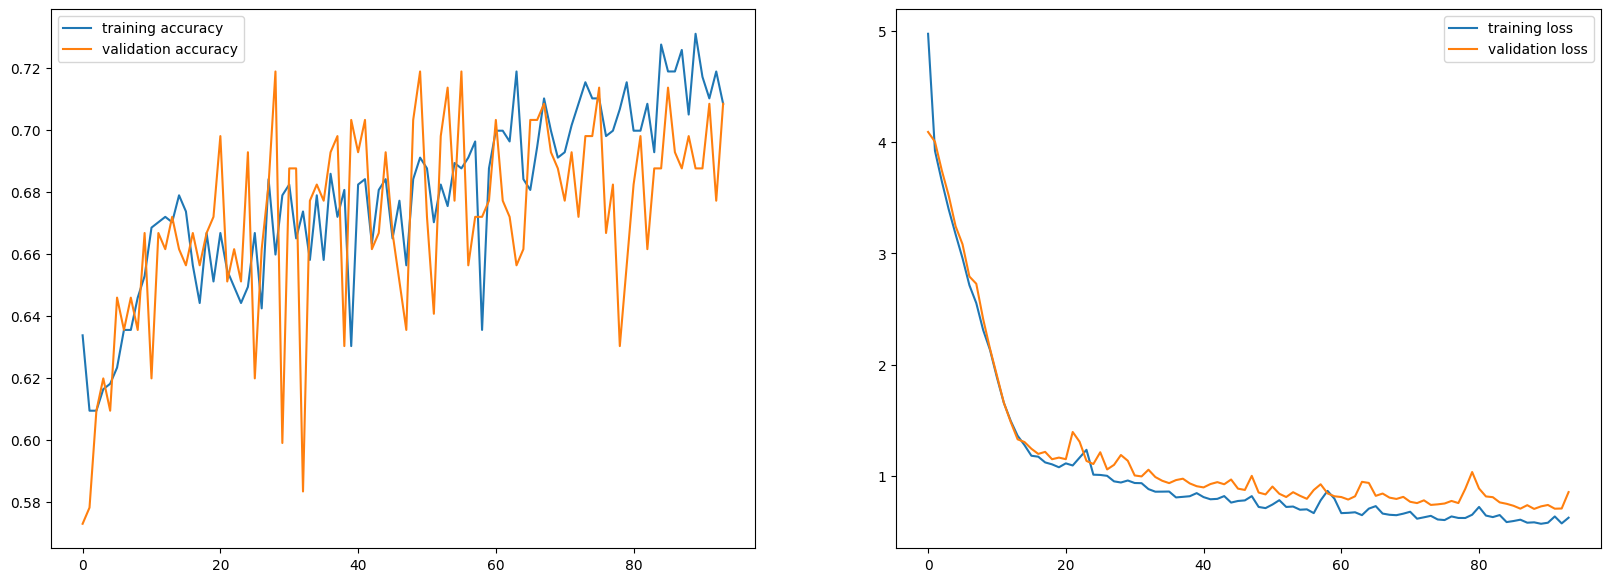

In [ ]:
plt.subplots(nrows=1,ncols=2,figsize = (20,7))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training accuracy','validation accuracy'])
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training loss','validation loss'])


# Optimizer Tuning

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np   
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split

In [ ]:
import kerastuner as kt # for tuning

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Flatten

In [ ]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.25, random_state=42)

# Finding Best Optimizer

In [ ]:
def build_model(hp): # hp = Hyper parameter
    model = Sequential()

    model.add(Dense(32,activation = 'relu', input_dim = 8))
    model.add(Dense(1,activation = 'sigmoid'))

    optimizer = hp.Choice('Optimizer',values = ['adam','sgd','rmsprop','adadelta'])

    model.compile(optimizer=optimizer,loss= 'binary_crossentropy',metrics = ['accuracy'])

    return model

In [ ]:
tuner = kt.RandomSearch(
    hypermodel=build_model,
    objective='val_accuracy',
    max_trials=5,
    # directory = 'result'
    )

INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


In [ ]:
tuner.search(X_train,y_train,epochs = 5,validation_data = (X_test,y_test))

INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.get_best_hyperparameters()[0].values

{'Optimizer': 'adam'}

In [ ]:
tuner.get_best_models()

In [ ]:
model = tuner.get_best_models(num_models=1)[0]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


### Training in best parameter

In [ ]:
historyHyperModel = model.fit(X_train,y_train,batch_size=32,epochs=100,initial_epoch=6,validation_data=(X_train,y_train))

Epoch 7/100
18/18 [==============================] - 1s 14ms/step - loss: 0.8728 - accuracy: 0.6736 - val_loss: 0.8111 - val_accuracy: 0.6649
Epoch 8/100
18/18 [==============================] - 0s 5ms/step - loss: 0.8085 - accuracy: 0.6528 - val_loss: 0.7576 - val_accuracy: 0.6736
Epoch 9/100
18/18 [==============================] - 0s 6ms/step - loss: 0.8387 - accuracy: 0.6372 - val_loss: 0.8648 - val_accuracy: 0.6649
Epoch 10/100
18/18 [==============================] - 0s 5ms/step - loss: 0.8045 - accuracy: 0.6545 - val_loss: 0.7907 - val_accuracy: 0.6337
Epoch 11/100
18/18 [==============================] - 0s 5ms/step - loss: 0.8113 - accuracy: 0.6406 - val_loss: 0.7091 - val_accuracy: 0.6753
Epoch 12/100
18/18 [==============================] - 0s 4ms/step - loss: 0.7382 - accuracy: 0.6684 - val_loss: 0.7204 - val_accuracy: 0.6736
Epoch 13/100
18/18 [==============================] - 0s 5ms/step - loss: 0.7208 - accuracy: 0.6701 - val_loss: 0.6821 - val_accuracy: 0.6997
Epoch 14

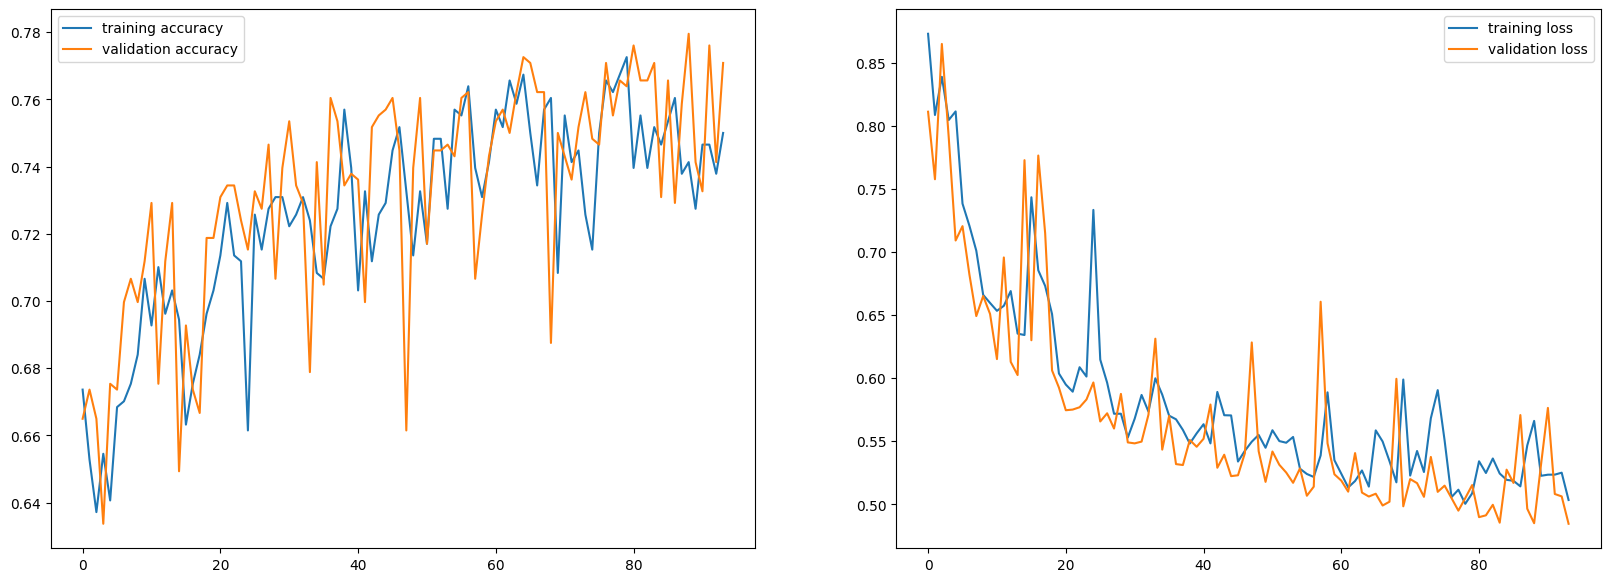

In [ ]:
plt.subplots(nrows=1,ncols=2,figsize = (20,7))
plt.subplot(1,2,1)
plt.plot(historyHyperModel.history['accuracy'])
plt.plot(historyHyperModel.history['val_accuracy'])
plt.legend(['training accuracy','validation accuracy'])
plt.subplot(1,2,2)
plt.plot(historyHyperModel.history['loss'])
plt.plot(historyHyperModel.history['val_loss'])
plt.legend(['training loss','validation loss'])


# Activation Tuning

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import kerastuner as kt # for tuning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras import regularizers

In [ ]:
df = pd.read_csv('diabetes.csv')
X = df.drop(columns=['Outcome'])
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.25, random_state=42)
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[ 0.6839137 , -0.70579433, -0.625833  , ...,  0.26501306,
        -0.11390738,  0.87654579],
       [-0.52726014, -0.26972894,  0.29889263, ...,  0.48823955,
        -0.94569142, -1.03690611],
       [-0.52726014, -0.39431905, -0.29945925, ..., -0.15517797,
        -0.91619553, -1.03690611],
       ...,
       [ 0.6839137 ,  0.07289387,  0.13570575, ...,  0.21248918,
         0.77981801,  0.09377001],
       [-0.22446668, -1.32874488, -1.06099801, ..., -0.12891603,
        -0.65073254, -0.60203068],
       [-0.22446668, -0.45661411,  0.13570575, ..., -0.81172646,
        -0.77166568, -0.51505559]])

In [ ]:
def build_model_activation(hp):
    model = Sequential()

    for i in range(hp.Int('num_layers',1,3)):
        if i == 0:
            model.add(Dense(
                units = 32,
                activation = hp.Choice(name = 'activation',values = ['relu','tanh','elu']),
                input_dim =8))
        else:
            model.add(Dense(
                units = 128,
                activation = hp.Choice(name = 'activation',values = ['relu','tanh','elu']),
                kernel_regularizer = regularizers.L2(0.02)
            ))
    model.add(Dense(
        units = 1,
        activation = 'sigmoid'
    ))


    optimizer = hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop', 'adadelta'])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
tuner = kt.RandomSearch(
    hypermodel=build_model_activation,
    objective='val_accuracy',
    max_trials=5,
    directory ='tuner',
    project_name = 'ActivationTuner'
)

In [ ]:
tuner.search(X_train,y_train,epochs = 5,validation_data = (X_test,y_test))

Trial 5 Complete [00h 00m 01s]
val_accuracy: 0.7239583134651184

Best val_accuracy So Far: 0.7447916865348816
Total elapsed time: 00h 00m 08s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 3, 'activation': 'elu', 'optimizer': 'rmsprop'}

In [ ]:
model = tuner.get_best_models(num_models=1)[0]
model

In [ ]:
history = model.fit(X_train,y_train,batch_size=32,epochs=100,initial_epoch=5,validation_data=(X_test,y_test))

Epoch 6/100
18/18 [==============================] - 1s 14ms/step - loss: 4.2254 - accuracy: 0.6319 - val_loss: 4.6164 - val_accuracy: 0.5938
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 3.6708 - accuracy: 0.6528 - val_loss: 3.1960 - val_accuracy: 0.6875
Epoch 8/100
18/18 [==============================] - 0s 4ms/step - loss: 3.6545 - accuracy: 0.6337 - val_loss: 3.3520 - val_accuracy: 0.6667
Epoch 9/100
18/18 [==============================] - 0s 3ms/step - loss: 3.1166 - accuracy: 0.6493 - val_loss: 2.8423 - val_accuracy: 0.7031
Epoch 10/100
18/18 [==============================] - 0s 3ms/step - loss: 2.9549 - accuracy: 0.6354 - val_loss: 2.8919 - val_accuracy: 0.6562
Epoch 11/100
18/18 [==============================] - 0s 3ms/step - loss: 2.5437 - accuracy: 0.7326 - val_loss: 3.3357 - val_accuracy: 0.6302
Epoch 12/100
18/18 [==============================] - 0s 3ms/step - loss: 2.4733 - accuracy: 0.6701 - val_loss: 2.2725 - val_accuracy: 0.7552
Epoch 13/

In [ ]:
100-6

94

Text(0.5, 1.0, 'val_loss- 0.62 and loss- 0.521')

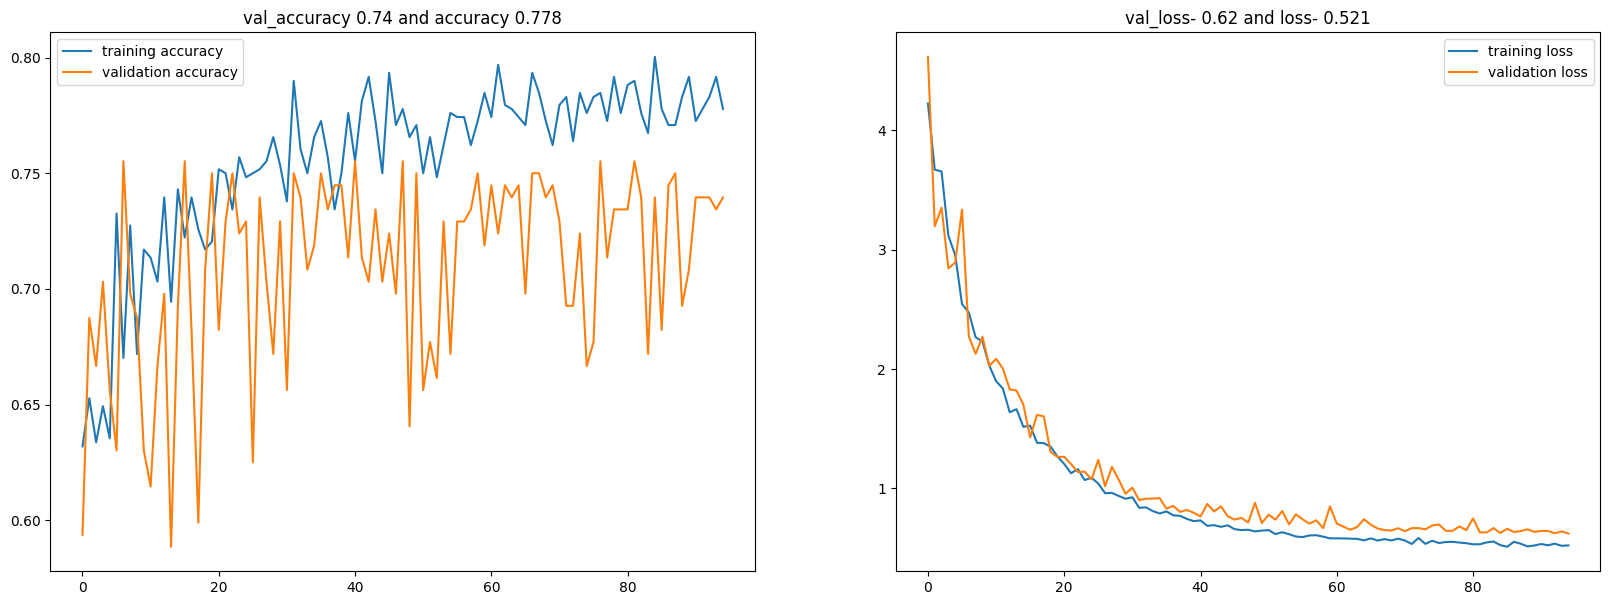

In [ ]:
plt.subplots(nrows=1,ncols=2,figsize = (20,7))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training accuracy','validation accuracy'])
plt.title(f'val_accuracy {round(history.history["val_accuracy"][94],ndigits=3)} and accuracy {round(history.history["accuracy"][94],ndigits=3)}')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training loss','validation loss'])
plt.title(f'val_loss- {round(history.history["val_loss"][94],ndigits=3)} and loss- {round(history.history["loss"][94],ndigits=3)}')


# Layer Tuning

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import kerastuner as kt # for tuning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Flatten

C:\Users\Gyanprakash\AppData\Local\Temp\ipykernel_17072\3655248104.py:9: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt # for tuning


In [ ]:
df = pd.read_csv('diabetes.csv')
X = df.drop(columns=['Outcome'])
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.25, random_state=42)
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[ 0.6839137 , -0.70579433, -0.625833  , ...,  0.26501306,
        -0.11390738,  0.87654579],
       [-0.52726014, -0.26972894,  0.29889263, ...,  0.48823955,
        -0.94569142, -1.03690611],
       [-0.52726014, -0.39431905, -0.29945925, ..., -0.15517797,
        -0.91619553, -1.03690611],
       ...,
       [ 0.6839137 ,  0.07289387,  0.13570575, ...,  0.21248918,
         0.77981801,  0.09377001],
       [-0.22446668, -1.32874488, -1.06099801, ..., -0.12891603,
        -0.65073254, -0.60203068],
       [-0.22446668, -0.45661411,  0.13570575, ..., -0.81172646,
        -0.77166568, -0.51505559]])

In [ ]:
def build_model(hp):
    model = Sequential()

    model.add(Dense(72,activation = 'relu', input_dim =  8))
    for i in range(hp.Int('num_layers',min_value = 1,max_value = 10)):
        
        model.add(Dense(72,activation = 'relu',))
    
    model.add(Dense(1,activation = 'sigmoid'))

    model.compile(optimizer = 'rmsprop',loss= 'binary_crossentropy',metrics = ['accuracy'])

    return model


In [ ]:
tuner = kt.RandomSearch(
    hypermodel=build_model,
    objective='val_accuracy',
    max_trials=3,
    directory = 'tuner',
    project_name = 'NUmlayerTuner'

)

In [ ]:
tuner.search(X_train,y_train,epochs = 5,validation_data = (X_test,y_test))

Trial 3 Complete [00h 00m 03s]
val_accuracy: 0.6875

Best val_accuracy So Far: 0.6875
Total elapsed time: 00h 00m 08s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 9}

In [ ]:
model = tuner.get_best_models(num_models=1)[0]
model

In [ ]:
history = model.fit(X_train,y_train,batch_size=32,epochs=100,initial_epoch=6,validation_data=(X_test,y_test))

Epoch 7/100
18/18 [==============================] - 2s 20ms/step - loss: 0.6206 - accuracy: 0.6701 - val_loss: 0.6165 - val_accuracy: 0.6875
Epoch 8/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6171 - accuracy: 0.6337 - val_loss: 0.6272 - val_accuracy: 0.6927
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6133 - accuracy: 0.6788 - val_loss: 0.6140 - val_accuracy: 0.6979
Epoch 10/100
18/18 [==============================] - 0s 6ms/step - loss: 0.6075 - accuracy: 0.6944 - val_loss: 0.6312 - val_accuracy: 0.6667
Epoch 11/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6093 - accuracy: 0.6753 - val_loss: 0.6353 - val_accuracy: 0.6771
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 0.5841 - accuracy: 0.6997 - val_loss: 0.6493 - val_accuracy: 0.6458
Epoch 13/100
18/18 [==============================] - 0s 5ms/step - loss: 0.5966 - accuracy: 0.6875 - val_loss: 0.6160 - val_accuracy: 0.6719
Epoch 14

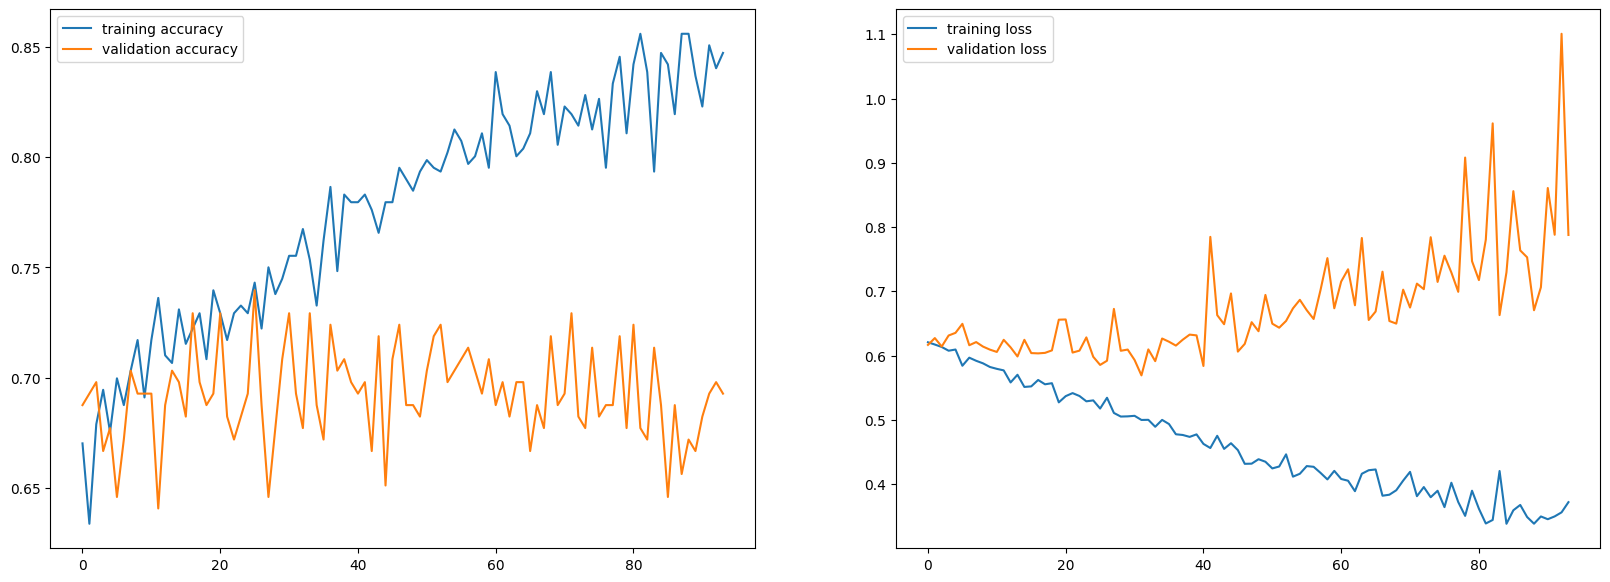

In [ ]:
plt.subplots(nrows=1,ncols=2,figsize = (20,7))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training accuracy','validation accuracy'])
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training loss','validation loss'])


# Hyper Parameter Tuning 

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import kerastuner as kt # for tuningb
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras import regularizers

In [ ]:
df = pd.read_csv('diabetes.csv')
X = df.drop(columns=['Outcome'])
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.25, random_state=42)
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[ 0.6839137 , -0.70579433, -0.625833  , ...,  0.26501306,
        -0.11390738,  0.87654579],
       [-0.52726014, -0.26972894,  0.29889263, ...,  0.48823955,
        -0.94569142, -1.03690611],
       [-0.52726014, -0.39431905, -0.29945925, ..., -0.15517797,
        -0.91619553, -1.03690611],
       ...,
       [ 0.6839137 ,  0.07289387,  0.13570575, ...,  0.21248918,
         0.77981801,  0.09377001],
       [-0.22446668, -1.32874488, -1.06099801, ..., -0.12891603,
        -0.65073254, -0.60203068],
       [-0.22446668, -0.45661411,  0.13570575, ..., -0.81172646,
        -0.77166568, -0.51505559]])

In [ ]:
def build_hyper_model(hp):
    model = Sequential()

    counter = 0

    for i in range(hp.Int('num_layers',min_value = 1,max_value = 10)):
        if counter == 0:
            model.add(
                Dense(
                units = hp.Int('num_nodes'+str(i),min_value=8,max_value = 128,step=8),
                activation = hp.Choice('activation'+str(i),values = ['tanh','relu','elu']),
                input_dim = 8,
                name = 'input_layer-'+str(i)
                )
            )
        else:
            model.add(
                Dense(
                units = hp.Int('num_node'+str(i),min_value = 8,max_value = 128,step=8),
                activation = hp.Choice('activaton'+str(i),values = ['tanh','relu','elu']),
                name = 'Middle_layer-'+str(i)),
                kernel_regularizer = regularizers.L2(.02)
            )
        counter+=1

    model.add(
        Dense(
        units = 1,
        activation = 'sigmoid',
        name= 'Output_layer')
    )

    model.compile(
        optimizer = hp.Choice('optimizer',values = ['rmsprop','adam','sdg','nadam']),
        loss = 'binary_crossentropy',
        metrics = ['accuracy']
        )

    return model
        

In [ ]:
tuner = kt.RandomSearch(hypermodel=build_hyper_model,
                        objective='val_accuracy',
                        max_trials=3,
                        directory = 'tuner',
                        project_name = 'Hyper_modelwithAllBestParameters')


In [ ]:
tuner.search(X_train,y_train,epochs = 5,validation_data = (X_test,y_test))

Trial 3 Complete [00h 00m 00s]

Best val_accuracy So Far: 0.5572916865348816
Total elapsed time: 00h 00m 03s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 1,
 'num_nodes0': 40,
 'activation0': 'elu',
 'optimizer': 'adam',
 'num_node1': 48,
 'activaton1': 'elu'}

In [ ]:
model = tuner.get_best_models()[0]
model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer-0 (Dense)       (None, 40)                360       
                                                                 
 Output_layer (Dense)        (None, 1)                 41        
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(
        x=X_train,
        y=y_train,
        batch_size = 32,
        epochs=100,
        validation_data= (X_test,y_test),
        )

Epoch 1/100
18/18 [==============================] - 1s 14ms/step - loss: 3.2534 - accuracy: 0.5330 - val_loss: 2.9164 - val_accuracy: 0.5521
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 2.7066 - accuracy: 0.5156 - val_loss: 2.4109 - val_accuracy: 0.5625
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 2.2420 - accuracy: 0.5139 - val_loss: 2.0073 - val_accuracy: 0.5469
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 1.8790 - accuracy: 0.5191 - val_loss: 1.8134 - val_accuracy: 0.5833
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 1.6339 - accuracy: 0.5174 - val_loss: 1.6200 - val_accuracy: 0.6042
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 1.4237 - accuracy: 0.5347 - val_loss: 1.3551 - val_accuracy: 0.6250
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 1.2664 - accuracy: 0.5590 - val_loss: 1.2841 - val_accuracy: 0.5469
Epoch 8/100


In [ ]:
history.history['val_accuracy'][99]

0.7239583134651184

Text(0.5, 1.0, 'val_loss- 0.585 and loss- 0.499')

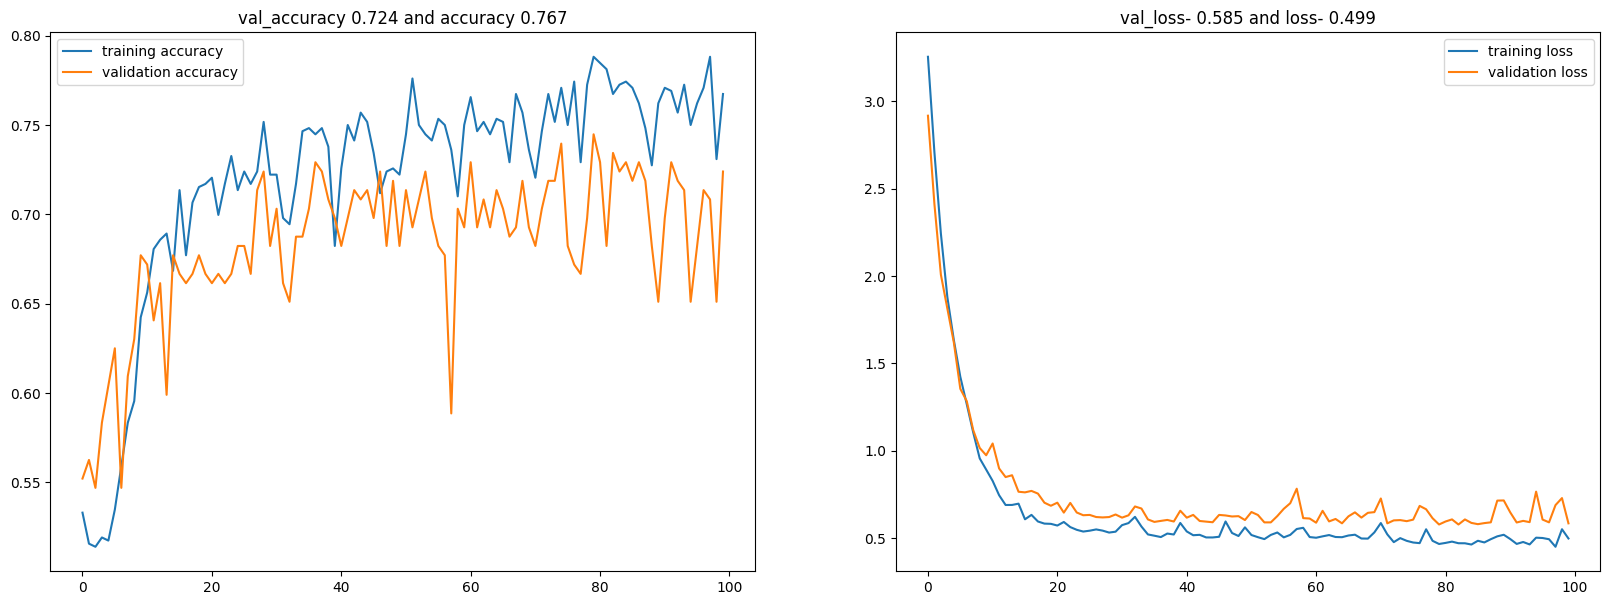

In [ ]:
plt.subplots(nrows=1,ncols=2,figsize = (20,7))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training accuracy','validation accuracy'])
plt.title(f'val_accuracy {round(history.history["val_accuracy"][99],ndigits=3)} and accuracy {round(history.history["accuracy"][99],ndigits=3)}')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training loss','validation loss'])
plt.title(f'val_loss- {round(history.history["val_loss"][99],ndigits=3)} and loss- {round(history.history["loss"][99],ndigits=3)}')
